## create a connection to the database using the library sqlite3

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('../ex00/data/checking-logs.sqlite.sqlite copy')

In [97]:
weekend = pd.io.sql.read_sql("""
SELECT CAST(strftime('%H', timestamp) as integer) as hour, COUNT() / COUNT(DISTINCT strftime('%Y-%m-%d', timestamp)) as weekend
FROM checker
WHERE strftime('%w', timestamp) in ('0', '6') and uid like 'user_%'
GROUP BY strftime('%H', timestamp)
""", conn)
working = pd.io.sql.read_sql("""
SELECT CAST(strftime('%H', timestamp) as integer) as hour, COUNT()  / COUNT(DISTINCT strftime('%Y-%m-%d', timestamp)) as working_day
FROM checker
WHERE strftime('%w', timestamp) not in ('0', '6') and uid like 'user_%' 
GROUP BY strftime('%H', timestamp)
""", conn)
hours = pd.DataFrame({'hour': list(range(24))})
weekend = weekend.merge(hours, on='hour', how='outer')
working = working.merge(hours, on='hour', how='outer')
result = weekend.merge(working, on='hour', how='outer')
result.sort_values(by=["hour"], inplace=True)
result.set_index('hour', inplace=True)

array([<AxesSubplot:title={'center':'weekend'}, xlabel='hour'>,
       <AxesSubplot:title={'center':'working_day'}, xlabel='hour'>],
      dtype=object)

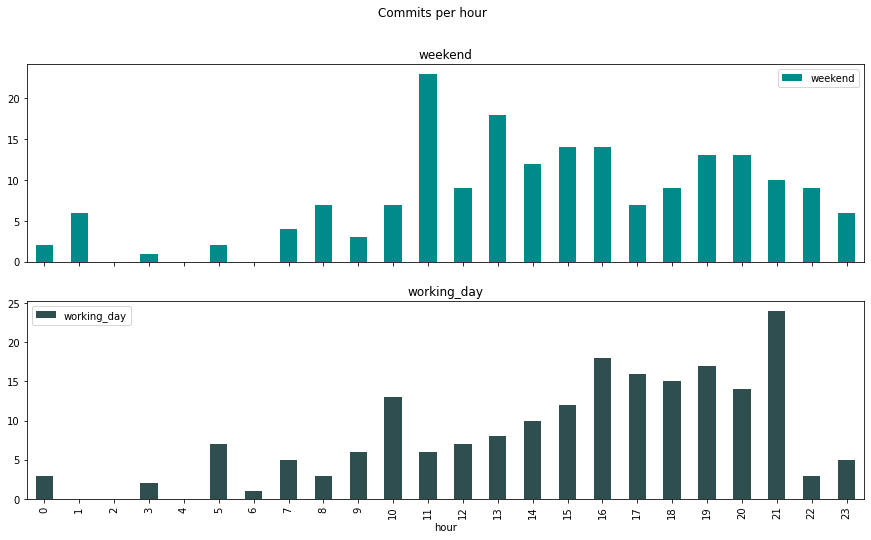

In [100]:
result.plot.bar(title='Commits per hour', figsize=(15,8), subplots=True,
                      color={"weekend": "darkcyan", "working_day": "darkslategray"})

## “Is the dynamic different on working days and weekends?”
#### working: 21 hour
#### weekend: 11 hour